## Name: Vaishnav Thorwat

#  Task 1: Iris Classification

### Problem Statement:
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

# Importing libraries

In [57]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Uploading Dataset

In [58]:
df=pd.read_csv('iris.csv')


## Exploratory Data Analysis(EDA)

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [61]:
#dropping Unwanted Column
df=df.drop(columns=['Id'])


In [62]:
#Checking for Dublicates
data = df.drop_duplicates(subset ="Species",)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization

<Axes: xlabel='Species', ylabel='count'>

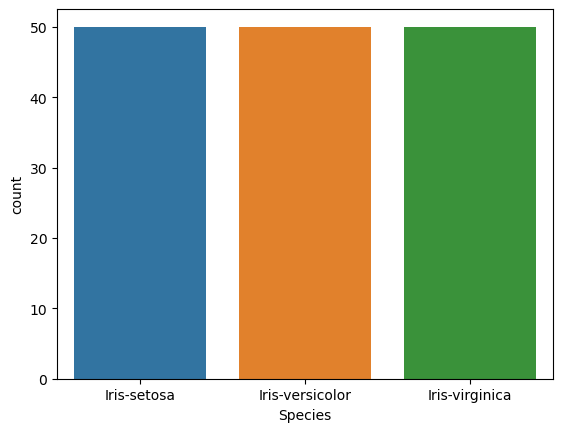

In [66]:
sns.countplot(x='Species', data=df)

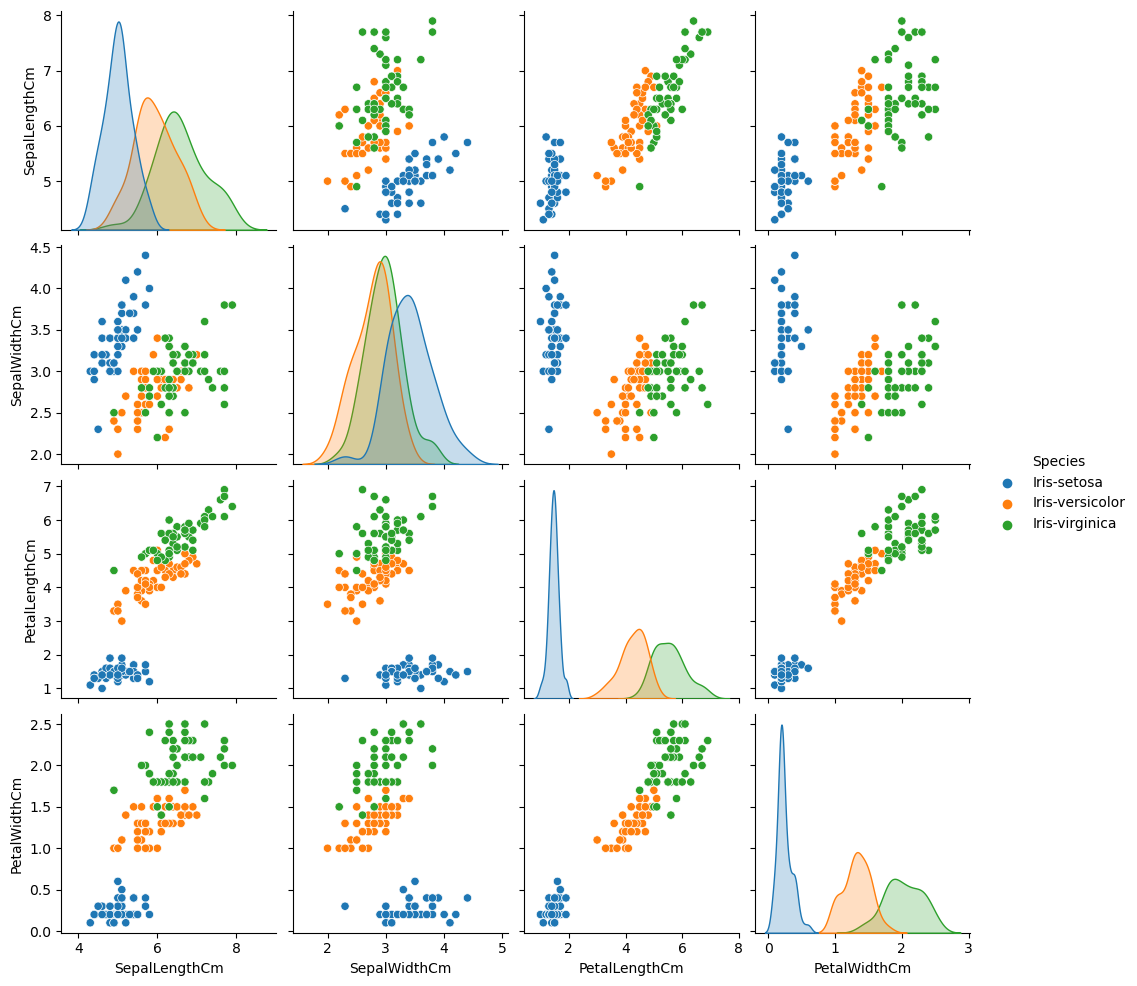

In [67]:
sns.pairplot(df,hue='Species')

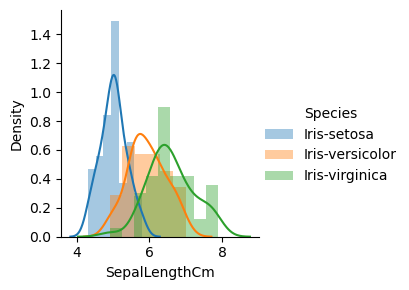

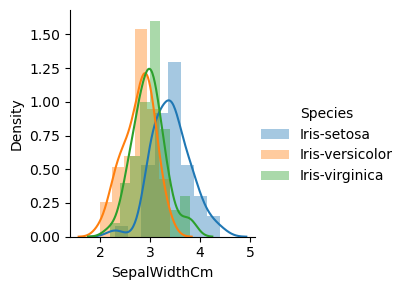

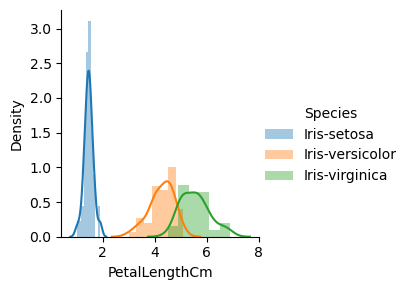

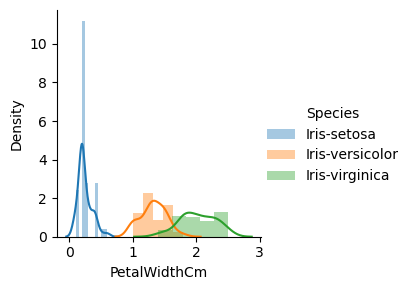

In [68]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
 
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()

## Dependent And Independent Variables

In [69]:
data=df.values
x= df.drop(columns=['Species'])
y=df['Species']

In [70]:
y.shape

(150,)

In [71]:
x.shape

(150, 4)

## Training Model

In [72]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=1)
#We Splittied Data into  Test=45,Train=105

In [73]:
print(y_train.shape)
print(x_train.shape)

(105,)
(105, 4)


In [74]:
print(y_test.shape)
print(x_test.shape)

(45,)
(45, 4)


# Using K-Nearest Neighbors Classifier(KNN)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn= KNeighborsClassifier(n_neighbors = 3)

In [77]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Check Accuracy

In [78]:
y_pred = knn.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [80]:
print(accuracy_score(y_test,y_pred)*100,'%')

97.77777777777777 %


In [81]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [82]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
